1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

[ 0.10383031 -0.82126346] [-1.70788983  0.87845826] [ 1.70791065 -0.87845746] [0. 0.] [-0.10378405  0.8212641 ]
minima    (x_min, y_min) -----> f(x_min,y_min)
first minima() [ 0.10383031 -0.82126346] -0.6347396517415296
second minima() [-1.70788983  0.87845826] 0.028630204576291174
third minima() [ 1.70791065 -0.87845746] 0.02863021739645044
fourth minima() [0. 0.] 0.0
fifth minima() [-0.10378405  0.8212641 ] -0.6347396434847934


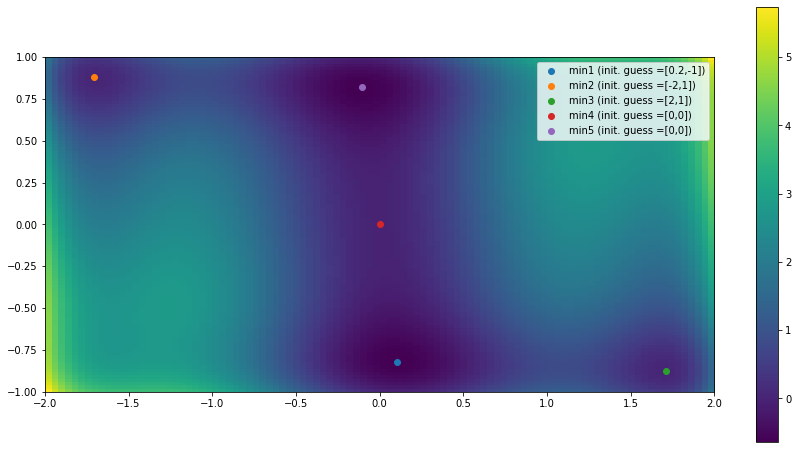

In [182]:
import scipy as sp
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def f(w):
    x=w[0]
    y=w[1]
    return (4 - 2.1 * x**2 + x**4 /3) * x**2 +x*y + (4* y**2 - 4) * y**4

min1 = optimize.minimize(f, [0.2,-1], method='Powell')
min2 = optimize.minimize(f,[-2,1], method='Nelder-Mead')
min3 = optimize.minimize(f,[2,1], method='Nelder-Mead')
min4 = optimize.minimize(f,[0,0], method='CG')
min5 = optimize.minimize(f, [0,0], method='Nelder-Mead')
print(min1.x, min2.x , min3.x, min4.x, min5.x)
print('minima    (x_min, y_min) -----> f(x_min,y_min)')

print('first minima()',min1.x, min1.fun)
print('second minima()',min2.x, min2.fun)
print('third minima()',min3.x, min3.fun)
print('fourth minima()',min4.x, min4.fun)
print('fifth minima()',min5.x, min5.fun)


x0 = np.linspace(-2, 2, 100)
x1 = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x0,x1)

fig = plt.figure(figsize=[15,8])
plt.imshow(f([X,Y]), extent=[-2,2,-1,1], origin='lower')
plt.colorbar()

plt.scatter(min1.x[0],min1.x[1], label='min1 (init. guess =[0.2,-1])')
plt.scatter(min2.x[0],min2.x[1], label='min2 (init. guess =[-2,1])')
plt.scatter(min3.x[0],min3.x[1], label='min3 (init. guess =[2,1])')
plt.scatter(min4.x[0],min4.x[1], label='min4 (init. guess =[0,0])')
plt.scatter(min5.x[0],min5.x[1], label='min5 (init. guess =[0,0])')

plt.legend()

To find all the minimum, I try to change the method of spipy.optimize() and the initial guess in order to reach all the diffrent 5 minima. I found 2 global minima (purple and blue) and 3 local minima. 
However the red minima is not properly a minima but it's due to the initial guess that is [0,0].

Text(0.5, 0.92, 'Function')

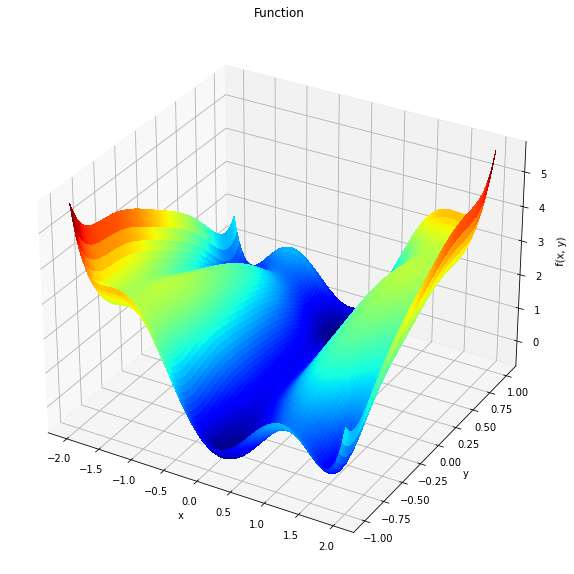

In [147]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, f([X,Y]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Function')


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

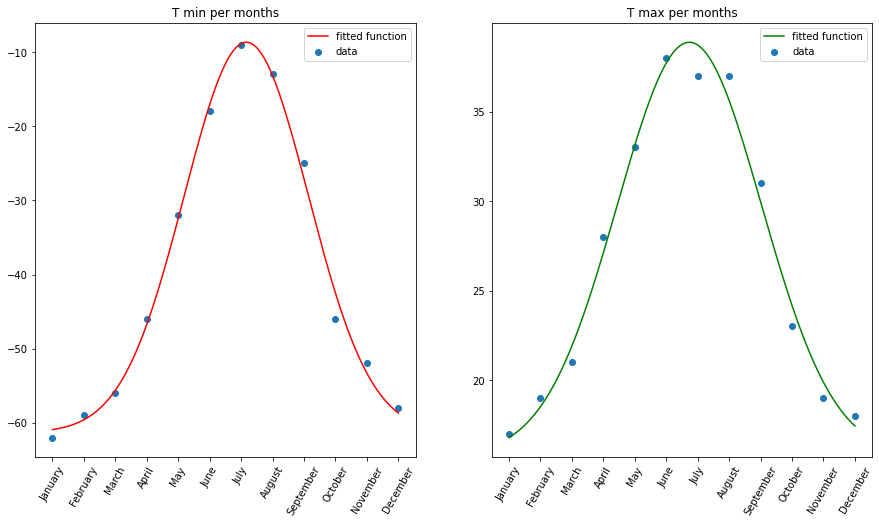

In [112]:
from scipy.optimize import curve_fit
import calendar

months_name=calendar.month_name[1:]
max = (17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18)
min = (-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax1.scatter(months_name,min, label='data')
ax1.set_title('T min per months')
ax1.tick_params(axis='x', which='major', rotation=60 )
ax2.scatter(months_name,max, label='data')
ax2.set_title('T max per months')
ax2.tick_params(axis='x', which='major', rotation=60 )


def gaussian(x, A, mu, sigma, offset):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * sigma**2)) + offset
x=np.linspace(0,11,1000)
months = [i for i in range(12)]

popt_min, pcov_min = curve_fit(gaussian, months, min, p0=[1,2,3,4],full_output=False)
ax1.plot(x, gaussian(x, *popt_min),label='fitted function', color='red')
ax1.legend()

popt_max, pcov_max = curve_fit(gaussian,months, max, p0=[1,2,3,4],full_output=False)
ax2.plot(x, gaussian(x, *popt_max),label='fitted function', color='green')
ax2.legend()




In [120]:
"""To estimate to goodness of the fitting one can calculate the correlation coefficient"""
ssr_min = np.sum((min - gaussian(months,*popt_min))**2)
tss_min = np.sum((np.mean(min) - min ) **2)

rsq_min = 1 - ssr_min / tss_min
print("The correlation coefficient of the T min")
print("R**2 =", rsq_min, "\nR =", np.sqrt(rsq_min))

ssr_max = np.sum((max - gaussian(months,*popt_max))**2)
tss_max= np.sum((np.mean(max) - max ) **2)

rsq_max = 1 - ssr_max / tss_max
print("The correlation coefficient of the T max")
print("R**2 =", rsq_max, "\nR =", np.sqrt(rsq_max))
"""Since they both are close to one, it's seems reasonable"""

The correlation coefficient of the T min
R**2 = 0.9946041936397214 
R = 0.9972984476272494
The correlation coefficient of the T max
R**2 = 0.9858796078351143 
R = 0.9929147032022007


"Since they both are close to one, it's seems reasonable"

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.